In [37]:
# importing required libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.preprocessing import StandardScaler
from contextlib import contextmanager
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split


# library options
%matplotlib inline
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [38]:
# load_data
df = pd.read_parquet("data/df_clean.parquet", engine='pyarrow')

In [23]:
features_123 = ['sum_day_1', 'sum_day_2', 'sum_day_3']
features_clump = ['clumpiness']
features_gradient = ['gradient']
features_target = ['sum_payments_package_key_ltv_uncapped', 'sum_payments_package_key_ltv', 'n_payments_package_key_ltv', 'sum_payments_package_key_ltv_class']
features_approach = features_gradient + features_clump + features_target

# just considering buyer
df = df[df["sum_payments_package_key"] > 0.0]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

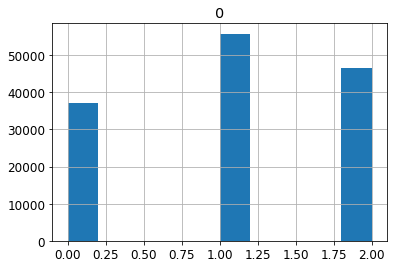

In [24]:
nclass = 3
target_df = np.array(df['sum_payments_package_key_ltv']).reshape(-1, 1)
trans = KBinsDiscretizer(n_bins = nclass, encode = 'ordinal', strategy = 'quantile')
#trans = KBinsDiscretizer(n_bins = nclass, encode='ordinal', strategy='uniform')
target_class = trans.fit_transform(target_df)

# convert the array back to a dataframe
dataset = pd.DataFrame(target_class)
# histograms of the variables
dataset.hist()

In [25]:
list(trans.bin_edges_[0])

[0.99, 2.99, 14.95, 164.81]

In [26]:
widths = []
for i in range(0,len(list(trans.bin_edges_[0]))):
    widths.append(list(trans.bin_edges_[0])[i+1]-list(trans.bin_edges_[0])[i])
    if i + 2 == len(list(trans.bin_edges_[0])):
        break
        
x_mid = []
counter = 0
for j in list(trans.bin_edges_[0]):
    if counter < len(widths):
        x_mid.append(j + widths[counter] / 2)
        counter += 1

plt.figure(figsize=(20, 8))
barlist = plt.bar(x_mid,list(dataset[0].value_counts()), width = widths)
colors = ['#4472C4', '#ED7D31', '#70AD47']
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
#Create the title, axis description and legend
plt.title('Discretization into equal-frequency Bins')
plt.ylabel('Target Value Data Points')
plt.xlabel("Bins")
#plt.legend()
#plt.grid()
#plt.xticks(rotation = 0)
plt.rcParams.update({'font.size': 12})
plt.savefig('results/bins.png')

TypeError: 'Series' object is not callable

In [8]:
# TODO change classes change int to low med high

df['sum_payments_package_key_ltv_class'] = target_class.astype('int')
#df['sum_payments_package_key_ltv_class'] = df['sum_payments_package_key_ltv_class'].apply(lambda x: 'low' if x == 0 else 'medium' if x == 1 else 'high' if x == 2 else 'fail')


In [9]:
# features to scale (just numeric)
features_to_scale = df.select_dtypes(include=np.number).columns.tolist()

# features to encode (just categorical)
features_to_encode = list(set(df) - set(features_to_scale + ['sum_payments_package_key_ltv_class']))

# do not scale approach features (123 and clumpiness)
features_to_scale = [feature for feature in features_to_scale if feature not in features_approach]

# only scale features with a range greater equal than a chosen threshhold
threshhold = 3
range = (df[features_to_scale].max() - df[features_to_scale].min()) # range(min,max) of a feature
features_to_scale = range[range >= threshhold].keys().tolist()

In [10]:
# initialize and fit scaler
scaler = StandardScaler()
scaler.fit(df[features_to_scale])

#scaler.mean_

StandardScaler()

In [11]:
#features_to_scale
features_to_scale

['n_ad_reward_claims',
 'n_ad_reward_fails',
 'n_ads_watched',
 'n_battlepass_lvls_finished',
 'masked_feature_0',
 'masked_feature_1',
 'masked_feature_2',
 'masked_feature_3',
 'masked_feature_4',
 'masked_feature_5',
 'masked_feature_6',
 'masked_feature_8',
 'masked_feature_13',
 'masked_feature_14',
 'masked_feature_15',
 'masked_feature_20',
 'masked_feature_21',
 'masked_feature_22',
 'masked_feature_23',
 'masked_feature_24',
 'masked_feature_25',
 'masked_feature_27',
 'masked_feature_28',
 'n_extra_challenge_buys',
 'n_friend_installs',
 'masked_feature_31',
 'n_clicked_add_friends',
 'n_friend_searches',
 'masked_feature_32',
 'masked_feature_35',
 'masked_feature_36',
 'masked_feature_37',
 'n_levels_completed',
 'n_missions_completed',
 'n_package_info_offers_viewed',
 'n_payments_package_key',
 'sum_payments_package_key',
 'n_package_tips_offers_viewed',
 'masked_feature_39',
 'n_sessions_ended',
 'total_session_duration',
 'max_session_end_player_level',
 'n_sessions_sta

In [27]:
# scaling
df[features_to_scale] = scaler.transform(df[features_to_scale])


In [28]:
# onehot encoding
df = pd.get_dummies(df, columns = features_to_encode)


In [29]:
list(df.columns)

['n_ad_reward_claims',
 'n_ad_reward_fails',
 'n_ads_watched',
 'n_battlepass_lvls_finished',
 'masked_feature_0',
 'masked_feature_1',
 'masked_feature_2',
 'masked_feature_3',
 'masked_feature_4',
 'masked_feature_5',
 'masked_feature_6',
 'masked_feature_7',
 'masked_feature_8',
 'masked_feature_13',
 'masked_feature_14',
 'masked_feature_15',
 'masked_feature_20',
 'masked_feature_21',
 'masked_feature_22',
 'masked_feature_23',
 'masked_feature_24',
 'masked_feature_25',
 'n_instant_awards_claims',
 'masked_feature_27',
 'masked_feature_28',
 'masked_feature_29',
 'n_extra_challenge_buys',
 'connected_fb',
 'connect_fb_attempt',
 'n_friend_installs',
 'masked_feature_30',
 'masked_feature_31',
 'n_accept_all_friends',
 'n_accept_friend',
 'n_clicked_add_friends',
 'n_friend_searches',
 'masked_feature_32',
 'masked_feature_35',
 'masked_feature_36',
 'masked_feature_37',
 'masked_feature_38',
 'n_levels_completed',
 'n_missions_completed',
 'n_package_info_offers_viewed',
 'n_paym

In [15]:
# Split into Train and Test
target_columns = ['sum_payments_package_key_ltv','sum_payments_package_key_ltv_class']
feature_columns = list(set(df.columns) - set(['sum_payments_package_key_ltv_class','sum_payments_package_key_ltv', 'n_payments_package_key_ltv', 'sum_payments_package_key_ltv_uncapped']))
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df[target_columns] , test_size = 0.2, random_state=42)


In [16]:
# reorder columns: approach_features at the end
features_right = list(set(features_approach) - set(features_target))

cols = X_train.columns.tolist()
cols_reorder = [x for x in cols if x not in features_right] + features_right
X_train = X_train[cols_reorder]
X_test = X_test[cols_reorder]

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (111791, 180)
Training Labels Shape: (111791, 2)
Testing Features Shape: (27948, 180)
Testing Labels Shape: (27948, 2)


In [17]:
# save data
X_train.to_parquet("data/X_train.parquet")
X_test.to_parquet("data/X_test.parquet")
y_train.to_parquet("data/y_train.parquet")
y_test.to_parquet("data/y_test.parquet")